# Проект: Исследование стартапов


- Автор: Дерновой П.В.
- Дата: 11.05.2025

# Введение

В проекте рассмотрен анализ рынка инвистиций в стартапы на исторических данных для финансовой компании, которая предоставляет льготные займы.

## Шаг 1. Знакомство с данными: загрузка и первичная предобработка

### Описание данных
#### Таблица `acquisition`
Содержит информацию о покупках одними компаниями других компаний:
- `id` — идентификатор покупки.
- `acquiring_company_id` — идентификатор покупающей компании.
- `acquired_company_id` — идентификатор покупаемой компании.
- `term_code` — варианты расчёта.
- `price_amount` — сумма сделки.
- `acquired_at` — дата сделки.
- 
#### Таблица `company_and_rounds`
Содержит информацию о компаниях и раундах финансирования:
- `company ID` — идентификатор компании.
- `name` — название компании.
- `category code` — категория области деятельности компании.
- `status` — статус компании.
- `founded at` — дата инвестирования.
- `closed at` — дата закрытия компании.
- `domain` — официальный сайт компании.
- `network username` — ник компании в сети.
- `country code` — код страны компании.
- `investment rounds` — число инвестиционных раундов.
- `funding rounds` — число раундов финансирования.
- `funding total` — сумма финансирования.
- `milestones` — вехи финансирования.
- `funding round id` — идентификатор этапа финансирования.
- `company id` — идентификатор компании.
- `funded at` — дата финансирования.
- `funding round type` — тип финансирования.
- `raised amount` — сумма финансирования.
- `pre money valuation` — предварительная денежная оценка.
- `participants` — число участников.
- `is first round` — является ли раунд первым.
- `is last round` — является раунд последним.

#### `Таблица education`
Содержит информацию об образовании сотрудника:
- `id` — идентификатор записи об образовании.
- `person_id` — идентификатор работника.
- `instituition` — название учебного заведения.
- `graduated_at` — дата получения образования.

#### Таблица `people`
Содержит информацию о сотрудниках:
- `id` — идентификатор сотрудника.
- `first_name` — имя сотрудника.
- `last_name` — фамилия сотрудника.
- `company_id` — идентификатор компании.
- `network_username` — ник в социальных сетях.

#### Таблица `degrees`
Содержит информацию о типе образования сотрудника:
- `id` — идентификатор записи.
- `object_id` — идентификатор сотрудника.
- `degree_type` — тип образования.
- `subject` — специальность.

Опциональные датасеты:
- `fund.csv`
- `investment.csv`

### Вывод общей информации, исправление названия столбцов

In [1]:
### Импортируем библиотеки
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
# import matplotlib_venn as venn2
import seaborn as sns
# устанавливаем библиотеку для визуализации диаграммы Венна и подгружаем нужные модули
!pip install matplotlib-venn -q
from matplotlib_venn import venn2, venn3

#Установим колличество столбцов для отображения равное 500
pd.set_option('display.max_columns', 500)

In [2]:
#Устанавливаем путь к каталогу с датасетами
PATH = "https://code.s3.yandex.net/datasets/"

# Выгружаем датасеты
df_acq_orig = pd.read_csv(PATH + 'acquisition.csv')
df_comp_rounds_orig = pd.read_csv(PATH + 'company_and_rounds.csv')
df_education_orig = pd.read_csv(PATH + 'education.csv')
df_people_orig = pd.read_csv(PATH + 'people.csv')
df_degrees_orig = pd.read_csv(PATH + 'degrees.csv')

# Делаем копии для дальнейшей обработки
df_acq = df_acq_orig.copy()
df_comp_rounds = df_comp_rounds_orig.copy()
df_education = df_education_orig.copy()
df_people = df_people_orig.copy()
df_degrees = df_degrees_orig.copy()

#### Рассмотрим датасет `df_acq`  и выведем первые строки

In [3]:
# Информация о датасете
df_acq.info()
# Выводим первые строки
display(df_acq.head(5))
# Проверяем названия столбцов
print(df_acq.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


Index(['id', 'acquiring_company_id', 'acquired_company_id', 'term_code',
       'price_amount', 'acquired_at'],
      dtype='object')


Названия столбцов:
- названия столбцов корректны

Типы данных:
- **`acquired_at`** - тип данных `object`. Содержимое столбцов является датой, можно преобразовать в тип данных `datetime`
- **остальные столбцы** - тип данных соответствует содержимому, можно снизить размерность до оптимальной

#### Рассмотрим датасет `df_comp_rounds`  и выведем первые строки

In [4]:
# Информация о датасете
df_comp_rounds.info()
# Выводим первые строки
display(df_comp_rounds.head(5))
# Проверяем названия столбцов
print(df_comp_rounds.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217472 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 non-nul

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,funding rounds,funding total,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,0.0,0.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Index(['company  ID', 'name', 'category  code', 'status', 'founded  at',
       'closed  at', 'domain', 'network  username', 'country  code',
       'investment  rounds', 'funding  rounds', 'funding  total', 'milestones',
       'funding  round  id', 'company  id', 'funded  at',
       'funding  round  type', 'raised  amount', 'pre  money  valuation',
       'participants', 'is  first  round', 'is  last  round'],
      dtype='object')


Названия столбцов:
- необходимо привести все столбцы к типу snake_case
- столбцы **`company ID` и `company id`** - дублируются названия и описание содержимого. При этом в столбце `company ID` пропуски отсутствуют, в отличие от столбца `company id`.

Типы данных:
- **`name`, `category code`, `status`, `domain`, `network username`, `country code`, `funding  round  type`** - тип данных `object`. Соответствует содиржимому.
- **`founded at`, `closed at`, `funded at`** - тип данных `object`. Содержимое столбцов является датой, можно преобразовать в тип данных `datetime`
- **`company  ID`, `investment  rounds`, `funding  rounds`, `funding  total`, `milestones`, `funding  round  id`, `company  id `, `pre  money  valuation`, `participants`, `is  first  round`, `is  last  round`** - тип данных `float64`. Необходимо преобразовать в `integer` с оптимальной размерностью.
- **`raised  amount`** - тип данных `float64`. Соответствует содиржимому. Необходимо снизить размерность для оптимизации.

Рассмотрим пересечения по столбцам **`company ID` и `company id`**

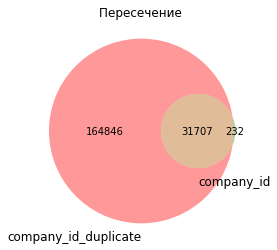

In [8]:
# код ревьюера

first_id = set(df_comp_rounds['company  ID'].dropna().unique())
second_id = set(df_comp_rounds['company  id'].dropna().unique())
# Строим диаграмму Венна
venn2([first_id, second_id], set_labels=('company_id_duplicate', 'company_id'))

# Отображаем график
plt.title("Пересечение ")
plt.show() 

In [9]:
df_comp_rounds.isna().sum()

company  ID                 302
name                        302
category  code            73888
status                      302
founded  at              107818
closed  at               214325
domain                    70615
network  username        122240
country  code            109167
investment  rounds          302
funding  rounds             302
funding  total              302
milestones                  302
funding  round  id       164846
company  id              164846
funded  at               165094
funding  round  type     164846
raised  amount           164846
pre  money  valuation    164846
participants             164846
is  first  round         164846
is  last  round          164846
dtype: int64

Видно что столбцы **`company ID` и `company id`** пересекаются. Также как сказано можно обратить внимание на колличество непустых значений в столбце `company id` и столбцах с 13 по 21. Наблюдается явная взаимосвязь.

Скорее всего это связано с данными в столбцах с 13 по 21.

Для дальнейшей работы переименуем столбец `company id` в `с_id`.

Приступим к преобразованию названий столбцов

In [10]:
#Переименовываем столбец `company id` в `с_id`.
df_comp_rounds = df_comp_rounds.rename(columns={'company  id': 'с_id'})

# Преобразовываем названия столбцов датасета к стилю snake case
# Между словами в названии столбцов содержиться двойной пробел. Заменим на _
df_comp_rounds.columns = df_comp_rounds.columns.str.lower().str.replace('  ', '_')

In [11]:
# Проверяем получившийся результат
print(df_comp_rounds.columns)

Index(['company_id', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'с_id', 'funded_at', 'funding_round_type',
       'raised_amount', 'pre_money_valuation', 'participants',
       'is_first_round', 'is_last_round'],
      dtype='object')


Теперь названия столбцов корректны

#### Рассмотрим датасет `df_education`  и выведем первые строки

In [12]:
# Информация о датасете
df_education.info()
# Выводим первые строки
display(df_education.head(5))
# Проверяем названия столбцов
print(df_education.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


Index(['id', 'person_id', 'instituition', 'graduated_at'], dtype='object')


Названия столбцов:
- формат названий столбцов корректный
- присутствует опечатка в столбце `instituition`. Исправим название на `institution`.

Типы данных:
- **`instituition`** - тип данных `object`. Соответствует содиржимому.
- **`graduated_at`** - тип данных `object`. Содержимое столбцов является датой, можно преобразовать в тип данных `datetime`
- **`id`, `person_id`** - тип данных `int64`. Соответствует содержимому. Можно снизить размерность до оптимальной.

In [13]:
#Переименовываем столбец `company id` в `с_id`.
df_education = df_education.rename(columns={'instituition': 'institution'})
# Проверяем названия столбцов после корректировки
print(df_education.columns)

Index(['id', 'person_id', 'institution', 'graduated_at'], dtype='object')


#### Рассмотрим датасет `df_people`  и выведем первые строки

In [14]:
# Информация о датасете
df_people.info()
# Выводим первые строки
display(df_people.head(5))
# Проверяем названия столбцов
print(df_people.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


Index(['id', 'first_name', 'last_name', 'company_id', 'network_username'], dtype='object')


Названия столбцов:
- названия столбцов корректны

Типы данных:
- **`first_name`, `last_name`, `network_username`** - тип данных `object`. Соответствует содиржимому.
- **`company_id`** - тип данных `float64`. Необходимо преобразовать в `integer` с оптимальной размерностью.
- **`id`** - тип данных `int64`. Соответствует содержимому. Можно снизить размерность до оптимальной.

#### Рассмотрим датасет `df_degrees`  и выведем первые строки

In [15]:
# Информация о датасете
df_degrees.info()
# Выводим первые строки
display(df_degrees.head(5))
# Проверяем названия столбцов
print(df_degrees.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


Index(['id', 'object_id', 'degree_type', 'subject'], dtype='object')


Названия столбцов:
- необходимо привести все столбцы к типу snake_case

Типы данных:
- **`degree_type`, `subject`** - тип данных `object`. Соответствует содиржимому.
- **`id`** - тип данных `int64`. Соответствует содержимому. Можно снизить размерность до оптимальной.
- **`object_id`** - содержит информацию о сотруднике в формате `p:****`. Далее преобразуем его в тип данных `integer`

In [16]:
# Добавляем новый столбец в которм выделяем номер сотрудника
df_degrees['person_id']=df_degrees['object_id'].str.replace('p:', '')

# Выводим первые строки для проверки результата
display(df_degrees.head(5))

,id,object_id,degree_type,subject,person_id
0,1,p:6117,MBA,NaN,6117
1,2,p:6136,BA,"English, French",6136
2,3,p:6136,MS,Mass Communication,6136
3,4,p:6005,MS,Internet Technology,6005
4,5,p:5832,BCS,"Computer Science, Psychology",5832


--- 

В результате ознокомления с датасетами принято решение:
- изменены названия столбцов в датасетах `df_comp_rounds`, `df_education`
- добавлен новый столбец в датасет `df_degrees` с номер с преобразованным номер сотрудника
- во всех датасетах необходимо корректировать, либо оптимизировать тип данных

### Смена типов данных

#### Преобразовываем типы данных в датасете `df_acq`

In [17]:
# Оптимизируем целочисленный тип данных в датасете
for column in ['id', 'acquiring_company_id', 'acquired_company_id', 'price_amount']:
    df_acq[column] = pd.to_numeric(df_acq[column], downcast='integer')
# Преобразовываем строковый тип данных в дату
df_acq['acquired_at'] = df_acq['acquired_at'].astype('datetime64[ns]')

# Проверяем резудьтат преобразования
print(df_acq.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9407 non-null   int16         
 1   acquiring_company_id  9407 non-null   int32         
 2   acquired_company_id   9407 non-null   int32         
 3   term_code             1831 non-null   object        
 4   price_amount          9407 non-null   int64         
 5   acquired_at           9378 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int16(1), int32(2), int64(1), object(1)
memory usage: 312.5+ KB
None


#### Преобразовываем типы данных в датасете `df_comp_rounds`

In [18]:
# Оптимизируем целочисленный тип данных в датасете
for column in ['company_id', 'investment_rounds', 'funding_rounds', 'funding_total', 'milestones', 'funding_round_id', 'pre_money_valuation', 'participants', 'is_first_round', 'is_last_round']:
    # Преобразовываем в integer
    df_comp_rounds[column] = pd.array(df_comp_rounds[column], dtype=pd.Int64Dtype())
    # Уменьшаем размерность
    df_comp_rounds[column] = pd.to_numeric(df_comp_rounds[column], downcast='integer')

# Оптимизируем тип данных с плавающей точкой в датасете
for column in ['raised_amount']:
    df_comp_rounds[column] = pd.to_numeric(df_comp_rounds[column], downcast='float')

# Преобразовываем строковый тип данных в дату
for column in ['founded_at', 'closed_at', 'funded_at']:
    df_comp_rounds[column] = df_comp_rounds[column].astype('datetime64[ns]')

# Проверяем резудьтат преобразования
print(df_comp_rounds.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_id           217472 non-null  Int64         
 1   name                 217472 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  Int64         
 10  funding_rounds       217472 non-null  Int64         
 11  funding_total        217472 non-null  Int64         
 12  milestones           217472 non-null  Int64         
 13  funding_round_

#### Преобразовываем типы данных в датасете `df_education`

In [19]:
# Оптимизируем целочисленный тип данных в датасете
for column in ['id', 'person_id']:
    df_education[column] = pd.to_numeric(df_education[column], downcast='integer')
# Преобразовываем строковый тип данных в дату
df_education['graduated_at'] = df_education['graduated_at'].astype('datetime64[ns]')

# Проверяем резудьтат преобразования
print(df_education.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            109610 non-null  int32         
 1   person_id     109610 non-null  int32         
 2   institution   109555 non-null  object        
 3   graduated_at  58054 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int32(2), object(1)
memory usage: 2.5+ MB
None


#### Преобразовываем типы данных в датасете `df_people`

In [20]:
# Преобразовываем в integer
df_people['company_id'] = pd.array(df_people['company_id'], dtype=pd.Int64Dtype())
# Уменьшаем размерность
df_people['company_id'] = pd.to_numeric(df_people['company_id'], downcast='integer')
df_people['id'] = pd.to_numeric(df_people['id'], downcast='integer')

# Проверяем резудьтат преобразования
print(df_people.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                226709 non-null  int32 
 1   first_name        226704 non-null  object
 2   last_name         226708 non-null  object
 3   company_id        34615 non-null   Int64 
 4   network_username  38867 non-null   object
dtypes: Int64(1), int32(1), object(3)
memory usage: 8.0+ MB
None


#### Преобразовываем типы данных в датасете `df_degrees`

In [21]:
# Уменьшаем размерность
df_degrees['id'] = pd.to_numeric(df_degrees['id'], downcast='integer')
# Преобразовываем формат с понижением размерности
df_degrees['person_id'] = pd.to_numeric(df_degrees['person_id'], downcast='integer')


# Проверяем резудьтат преобразования
print(df_degrees.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int32 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
 4   person_id    109610 non-null  int32 
dtypes: int32(2), object(3)
memory usage: 3.3+ MB
None


#### Промежуточный вывод
Во всех датасетах преобразованы типы данных в оптимальные для их содиржимого

### Анализ пропусков

#### Функции
Создаем пользовательские функции для удобства анализа
- показ имени датасета
- визуализация пропусков в датасете
- определения уникальных значений в столбце
- сравнение датафреймов по колличеству строк

In [22]:
def find_df_name(df):
    # функция определения имени датасета
    name = [name for name, obj in globals().items() if id(obj) == id(df)]
    return name[0] if name else None

def missing_df (df):
    # функция визуализации пропусков в датасете
    missing = (pd.DataFrame({'Кол-во пропусков': df.isnull().sum(), 'Доля пропусков': df.isnull().mean().round(4)})
           .style.background_gradient(cmap='coolwarm'))
    print('Пропуски в датасете:', find_df_name(df))
    display(missing)
    
def uniq_val (column):
    # функция определения уникальных значений в столбце
    # Фнкция возвращает уникальные значения, отсортированные по убыванию
    print(f'Уникальные значения в столбце:[{column.name}]')
    print(column.sort_values().unique())
    print()

def df_difference (df_1, df_2):
    # функция сравнивает колличество строк двух датасетов
        # df_1 - исходный датасет
        # df_2 - датасет после обработки
    df_1_len = len(df_1)
    df_2_len = len(df_2)
    print('Обработка датасета', find_df_name(df_2))
    print('  Исходное кол-во строк:       ', df_1_len)
    print('  Кол-во строк после обработки:', df_2_len)
    print('  Удалено строк:               ', df_1_len - df_2_len, '(', round((1-df_2_len/df_1_len)*100,2), '%)')

#### Пропуски в `df_acq`

In [23]:
missing_df(df_acq)

Пропуски в датасете: df_acq


,Кол-во пропусков,Доля пропусков
id,0,0.000000
acquiring_company_id,0,0.000000
acquired_company_id,0,0.000000
term_code,7576,0.805400
price_amount,0,0.000000
acquired_at,29,0.003100


Наблюдается большое колличество пропусков в столбце `term_code`.

Посмотрим внимательнее на уникальные значения содержащиеся в этом столбце

In [24]:
# Проверим уникальные значения в столбце term_code
uniq_val(df_acq['term_code'])

Уникальные значения в столбце:[term_code]
['cash' 'cash_and_stock' 'stock' nan]



Очевидно что пропуски связаны либо с ошибкой заполнения, либо с отсутствием информации.

Оставим пропуски без изменений

#### Пропуски в `df_comp_rounds`

In [25]:
# Строим таблицу с анализом пропусков в датасете
missing_df(df_comp_rounds)

Пропуски в датасете: df_comp_rounds


,Кол-во пропусков,Доля пропусков
company_id,302,0.001400
name,302,0.001400
category_code,73888,0.339300
status,302,0.001400
founded_at,107818,0.495100
closed_at,214325,0.984200
domain,70615,0.324300
network_username,122240,0.561300
country_code,109167,0.501300
investment_rounds,302,0.001400


---

Рассмотрим пропуски в столбце `company_id`

In [26]:
#Отфильтруем строки и оставим только с пропуском в с толбце company_id
df_comp_rounds[df_comp_rounds['company_id'].isnull()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 217472 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   company_id           0 non-null      Int64         
 1   name                 0 non-null      object        
 2   category_code        0 non-null      object        
 3   status               0 non-null      object        
 4   founded_at           0 non-null      datetime64[ns]
 5   closed_at            0 non-null      datetime64[ns]
 6   domain               0 non-null      object        
 7   network_username     0 non-null      object        
 8   country_code         0 non-null      object        
 9   investment_rounds    0 non-null      Int64         
 10  funding_rounds       0 non-null      Int64         
 11  funding_total        0 non-null      Int64         
 12  milestones           0 non-null      Int64         
 13  funding_round_id     302 no

Очевидно что пропуски в столбцах с 0 до 12 связаны между собой.

Удалим эти строки

In [27]:
# Удаляем строки с пропусками в столбце company_id
df_comp_rounds = df_comp_rounds.dropna(subset=['company_id'])

# Проверяем что получилось
missing_df(df_comp_rounds)

# Проверим размер получившегося датасета
df_difference (df_comp_rounds_orig, df_comp_rounds)

Пропуски в датасете: df_comp_rounds


,Кол-во пропусков,Доля пропусков
company_id,0,0.000000
name,0,0.000000
category_code,73586,0.338400
status,0,0.000000
founded_at,107516,0.494400
closed_at,214023,0.984100
domain,70313,0.323300
network_username,121938,0.560700
country_code,108865,0.500600
investment_rounds,0,0.000000


Обработка датасета df_comp_rounds
  Исходное кол-во строк:        217774
  Кол-во строк после обработки: 217472
  Удалено строк:                302 ( 0.14 %)


---

Рассмотрим пропуски в столбце `funding_round_id`

In [28]:
#Отфильтруем строки и оставим только с пропуском в с толбце funding_round_id
df_comp_rounds[df_comp_rounds['funding_round_id'].isnull()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164846 entries, 3 to 217468
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_id           164846 non-null  Int64         
 1   name                 164846 non-null  object        
 2   category_code        92723 non-null   object        
 3   status               164846 non-null  object        
 4   founded_at           66760 non-null   datetime64[ns]
 5   closed_at            506 non-null     datetime64[ns]
 6   domain               96374 non-null   object        
 7   network_username     61521 non-null   object        
 8   country_code         58425 non-null   object        
 9   investment_rounds    164846 non-null  Int64         
 10  funding_rounds       164846 non-null  Int64         
 11  funding_total        164846 non-null  Int64         
 12  milestones           164846 non-null  Int64         
 13  funding_round_

В столбцах с 13 по 21 прослеживается взимосвязь.

Скорее всего это связано с отсутствием финансирования этих компаний.

Оставим пропуски в этих столбцах как есть

---

Рассмотрим пропуски в столбцах `founded_at`, `category_code`, `country_code`.

Скорее всего пропуски связаны с некорректным заполнением информации либо либо отсутстыием раундов финансирования у компаний

---

Рассмотрим пропуски в столбце `closed_at`

Пропуски в этом столбце свидетельствуют о том, что компании на момент исследования не закрыта.

---

Рассмотрим пропуски в столбце `domain`, `network_username`

Пропуски в этом столбце свидетельствуют о том, что компании либо некорректно заполнила данные, либо отсутствует в сети интернет.

#### Пропуски в `df_education`

In [29]:
# Строим таблицу с анализом пропусков в датасете
missing_df(df_education)

Пропуски в датасете: df_education


,Кол-во пропусков,Доля пропусков
id,0,0.000000
person_id,0,0.000000
institution,55,0.000500
graduated_at,51556,0.470400


Пропуски в столбцах `instituition` и `graduated_at` связаны с неполным заполнением данных о сотрудниках.

Возможно сотрудники отказались заполнять эти данные

#### Пропуски в `df_people`

In [30]:
# Строим таблицу с анализом пропусков в датасете
missing_df(df_people)

Пропуски в датасете: df_people


,Кол-во пропусков,Доля пропусков
id,0,0.000000
first_name,5,0.000000
last_name,1,0.000000
company_id,192094,0.847300
network_username,187842,0.828600


Пропуски в столбцах `first_name` и `last_name` связаны с неполным заполнением данных о сотрудниках.

Скорее всего данные внесены ошибочно.

Так как кол-во пропусков невелико, можно удалить эти строки из датасета.

In [31]:
# Удаляем строки с пропусками в столбце company_id
df_people = df_people.dropna(subset=['first_name'])

# Проверяем что получилось
missing_df(df_people)

# Проверим размер получившегося датасета
df_difference (df_people_orig, df_people)

Пропуски в датасете: df_people


,Кол-во пропусков,Доля пропусков
id,0,0.000000
first_name,0,0.000000
last_name,0,0.000000
company_id,192090,0.847300
network_username,187837,0.828600


Обработка датасета df_people
  Исходное кол-во строк:        226709
  Кол-во строк после обработки: 226704
  Удалено строк:                5 ( 0.0 %)


---

Рассмотрим пропуски в столбце `company_id`, `network_username`.

Пропуски в этом столбце свидетельствуют о том, что данные заполнены некорректно.

#### Пропуски в `df_degrees`

In [32]:
# Строим таблицу с анализом пропусков в датасете
missing_df(df_degrees)

Пропуски в датасете: df_degrees


,Кол-во пропусков,Доля пропусков
id,0,0.000000
object_id,0,0.000000
degree_type,11218,0.102300
subject,28312,0.258300
person_id,0,0.000000


Рассмотрим пропуски в столбце `degree_type`, `subject`.

Пропуски в этом столбце свидетельствуют о том, что данные заполнены некорректно.

#### Промежуточный вывод по Шагу 1
Пропуски данных:
- Удалены явно некорректные строки из датасетов
    -  `df_comp_rounds` - 302 строк
    -  `df_people` - 9 строк
- Проверены пропуски во всех датасетах. Пропусков много и скорее всего они связаны с некорректным заполнением данных, либо по объективным причиным данные отсутствуют. Для исключения искажения данных пропуски оставлены как есть

Полнота данных:
- В датасете `df_acq` явно не хватает данных по варианту расчета (80 % пропусков). Это може привести к некорректному анализу по типу расчета
- В датасете `df_comp_rounds`:
    - категория области деятельности компании (33% пропусков). Это может исказит аналитику по областям деятельности компаний
    - дата инвистировани (49% пропусков). Очень высокий показатель который может повлиять на аналитику распределения инвистирования по годам
    - официальный сайт компании (32% пропусков) и ник компании в сети (56% пропусков) не должен никак сказаться на аналитике. Можно принебречь этими значениями
    - код страны (50% пропусков). Повлияет на аналитику распределения компаний по странам
    - пропуски по остальным столбцам (76% пропусков) объяснимы
- В датасете `df_education` значительное колличество пропусков по столбцу даты получения образования (47% пропусков). Не должно повлиять на поставленные задачи
- В датасете `df_people` значительное кол-во пропусков (84% пропусков) о принадлежности сотрудника к компании. Может повлиять на аналитику компаний, связанную с сотрудниками
- В датасете `df_degrees` значительное колличество пропусков в информации об образовании сторудников (10% пропусков) и специальности сотрудников (26% пропусков). Может сильно повлиять на аналитику компаний связанную с уровнем образованности сотрудников

## Шаг 2. Предобработка данных, предварительное исследование


### Раунды финансирования по годам

/tmp/ipykernel_292/1122991442.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtred_pivot_comp_rounds['roll_mean'] = filtred_pivot_comp_rounds[('median', 'raised  amount')].rolling(window=3).mean()


,count,median,roll_mean
,raised amount,raised amount,
funded_at_year,,,
1999,76,2000000.0,NaN
2000,125,4200000.0,NaN
2001,96,3000000.0,3.066667e+06
2002,116,4200000.0,3.800000e+06
2003,159,3000000.0,3.400000e+06
2004,291,5000000.0,4.066667e+06
2005,1633,5500000.0,4.500000e+06
2006,2436,5000000.0,5.166667e+06


/tmp/ipykernel_292/1122991442.py:55: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


<Figure size 432x360 with 0 Axes>

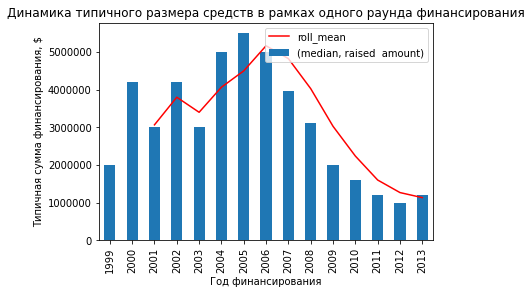

In [33]:
# Создаем копию исходного датасета
df_temp = df_comp_rounds_orig.copy()
# Добавляем столбец, в котором выделяем год из столбца 'funded  at'
df_temp['funded_at_year'] = df_temp['funded  at'].astype('datetime64[ns]').dt.year
# Преобразовываем тип данных в integer
df_temp['funded_at_year'] = pd.array(df_temp['funded_at_year'], dtype=pd.Int64Dtype())

# Создаем сводную тоаблицу по годам финансирования.
    # Считаем колличество этапов финансирования и медиану по каждому году
pivot_comp_rounds = pd.pivot_table(
    df_temp,
    index='funded_at_year',
    values='raised  amount',
    aggfunc=['count',  'median'])

# Фильтруем сводную таблицу и оставляем только года в которых колличество этапов финансирования больше 50
filtred_pivot_comp_rounds = pivot_comp_rounds[(pivot_comp_rounds[( 'count', 'raised  amount')] > 50 )]

# Подсчитываем скользящую среднюю и добавляемс в новый столбце
filtred_pivot_comp_rounds['roll_mean'] = filtred_pivot_comp_rounds[('median', 'raised  amount')].rolling(window=3).mean()

display(filtred_pivot_comp_rounds)

# Строим график
# Устанавливаем размеры графика
plt.figure(figsize=(6, 5))

# Строим гистограмму 
ax=filtred_pivot_comp_rounds.plot(
    kind='bar',
    y=( 'median', 'raised  amount'),
    legend = True,
    rot=90
    )

# сторим скользящую среднюю
filtred_pivot_comp_rounds.plot(
    kind='line',
    y='roll_mean',
    color='red',
    ax=ax,
    legend = True,
    use_index=False,
    rot=90
    )


plt.xlabel('Год финансирования')
plt.legend(title='')
plt.ylabel('Типичная сумма финансирования, $')
plt.title('Динамика типичного размера средств в рамках одного раунда финансирования')

# Настраиваем отображение значений пот оси Y
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

plt.show()

#### Выводы
На основе сводной таблицы и построенной диаграммы можно сделать следующие выводы:
- В 2005 году типичный размер собранных в рамках одного раунда средств был максимален?
- В 2013 году колличество раундов финансирования и размер средств в рамках одного раунда увеличился


### 2.2. Люди и их образование

Рассмотрим сведения об образовании сотрудников компаний.

Для этого объединим два датасета `df_people` и `df_education`.

In [34]:
# Преобразование типов данных сделано для устранения ошибки возникающей при объединении датасетов
 # ValueError: Buffer dtype mismatch, expected 'const int64_t' but got 'int'
df_people['id'] = df_people['id'].astype('int64')
df_education['person_id'] = df_education['person_id'].astype('int64')

# Обйденим датасеты df_people и df_education
people_education = df_people.merge(df_education, how='left', left_on='id', right_on='person_id', suffixes = ('_people','_education'))

# Удалим все неявные дубликаты строк по столбцам id_people + first_name + last_name
people_education = people_education.drop_duplicates(subset=['id_people', 'first_name', 'last_name']).reset_index(drop=True)

missing_df(people_education)

#Выделим признак наличия образования у сотрудника
education_true = people_education['institution'].notna() | people_education['graduated_at'].notna()

print('Доля сотрудников с наличием образования',round(education_true.mean(),4))

Пропуски в датасете: people_education


,Кол-во пропусков,Доля пропусков
id_people,0,0.000000
first_name,0,0.000000
last_name,0,0.000000
company_id,192090,0.847300
network_username,187836,0.828600
id_education,158632,0.699700
person_id,158632,0.699700
institution,158672,0.699900
graduated_at,190316,0.839500


Доля сотрудников с наличием образования 0.3002


Проанализирова полученные результаты можно сделать вывод что данные об образовании сотрудников не достаточно полны.

По полученным результатам лишь 30,02% сотрудников имеют образование.

Попробуем присодинить датасет `df_degrees` с данными о типе образования сотрудника после преобразования столбца `'person_id'` в пункте `1.2.5.` и перепроверим результаты

In [35]:
# Обйденим датасеты people_education и df_degrees
people_education_full = people_education.merge(df_degrees, how='left', left_on='id_people', right_on='person_id', suffixes = ('_people', '_degrees'))

# Удалим все неявные дубликаты строк по фильтру id_people + first_name + last_name
people_education_full = people_education_full.drop_duplicates(subset=['id_people', 'first_name', 'last_name']).reset_index(drop=True)



missing_df(people_education_full)

#Выделим признак наличия образования у сотрудника
education_true = people_education_full['institution'].notna() | people_education_full['graduated_at'].notna() | people_education_full['degree_type'].notna()

print('Доля сотрудников с наличием образования',round(education_true.mean(),4))

Пропуски в датасете: people_education_full


,Кол-во пропусков,Доля пропусков
id_people,0,0.000000
first_name,0,0.000000
last_name,0,0.000000
company_id,192090,0.847300
network_username,187836,0.828600
id_education,158632,0.699700
person_id_people,158632,0.699700
institution,158672,0.699900
graduated_at,190316,0.839500
id,158632,0.699700


Доля сотрудников с наличием образования 0.3003


После присоединения датасета `df_degrees` видим более точные данные об образовании сотрудников. 30,03% сотрудников компаний имеют образование

В дальнейшем будем использовать этот датасет для аналитики.

Добавим признак наличия образования в датасет `people_education_true`

In [36]:
#Выделим признак наличия образования у сотрудника
people_education_full['education_true']  = people_education_full['institution'].notna() | people_education_full['graduated_at'].notna() | people_education_full['degree_type'].notna()

Разделим все компании на несколько групп по количеству сотрудников и оценим среднюю долю сотрудников без информации об образовании в каждой из групп.

In [37]:
#Посчитаем кол-во сотрудников в каждой компании
people_education_full['company_people_count'] = people_education_full.groupby('company_id')['id_people'].count()
# Преобразовываем тип данных в integer
people_education_full['company_people_count'] = pd.array(people_education_full['company_people_count'], dtype=pd.Int64Dtype())

# Посмотрим на распределение значений в столбце с кол-вом сотрудников
print(people_education_full['company_people_count'].describe())

# Гистограмма распределения кол-ва сотрудников
plt.figure(figsize=(10, 6))
sns.countplot(data = people_education_full, x='company_people_count', color='blue')
plt.xticks(rotation=90)
plt.title('Распределение количества сотрудников в компании')
plt.xlabel('Количество сотрудников')
plt.ylabel('Количество компаний')
plt.tight_layout()
plt.show()

count    20404.000000
mean         1.548667
std          2.868234
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        244.000000
Name: company_people_count, dtype: float64


TypeError: boolean value of NA is ambiguous

<Figure size 720x432 with 0 Axes>

Из полученных результатов видим:
- максимальное колличество сотрудников в компании равно 244
- основная часть компаний имеет колличество сотрудников до 4

Исходя из этого разделим компании на категории
- 1 сотрудник в компании
- 2 сотрудника в компании
- 3 сотрудника в компании
- 4-5 сотрудников в компании
- 6-10 сотрудников в компании
- 11-25 сотрудников в компании
- более 26 сотрудников в компании

In [ ]:
# распределяем компании по группам
bins_list   = [0, 1, 2, 3, 5, 10, 25, float('inf')],
labels_list = ['1', '2', '3', '4-5', '6-10', '11-25', '26+']

people_education_full['company_people_group'] = pd.cut(people_education_full['company_people_count'], 
                                                       bins = [0, 1, 2, 3, 5, 10, 25, float('inf')], 
                                                       labels = ['1', '2', '3', '4-5', '6-10', '11-25', '26+']) 

# Рассмотрим долю сотрудников без образования в каждой категории
print('Доля сотрудников в компаниях без образования в зависимости от численности компании:')
people_education_comp_group = 1-people_education_full.groupby('company_people_group', observed=True)['education_true'].mean()

people_education_comp_group

#### Выводы
На основе полученных результатов можно сделать следующие выводы:
- 30% сотрудников компаний имеют образование.
- основаная часть сотрудников работает в компаниях с численностью до 4 человек
- максимальное колличество сотрудников в компании составляет 244 человек

Исходя из вышесказанного, чем крупнее компания, тем больше колличество сотрудников с образованием работает в этой компании.

### Объединять или не объединять — вот в чём вопрос
Проверим можно ли объеднить датасеты `df_comp_rounds` и `df_people` по столбцу `network_username`.

Посмотрим насколько часто встречаются одинаковые значения в этих датасетах

Поле network_username встречается в датасетах df_comp_rounds и df_people 2199 раз
Что составляет 1.01 % данных датасета df_comp_rounds


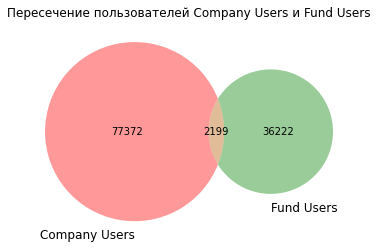

In [38]:
net_username_intersection = len(set(df_comp_rounds['network_username'][df_comp_rounds['network_username'].notna()]).intersection(df_people['network_username'][df_people['network_username'].notna()]))
print('Поле network_username встречается в датасетах df_comp_rounds и df_people', net_username_intersection, 'раз')
print('Что составляет', round((net_username_intersection/len(df_comp_rounds))*100,2), '% данных датасета df_comp_rounds')

# Строим диаграмму Венна
venn2([
    set(df_comp_rounds['network_username'][df_comp_rounds['network_username'].notna()]),
    set(df_people['network_username'][df_people['network_username'].notna()])
      ],
    set_labels=('Company Users', 'Fund Users'))

# Отображаем график
plt.title("Пересечение пользователей Company Users и Fund Users")
plt.show()  

#### Вывод
Из за редкого пересечения по столбцу `network_username` можно сделать вывод что датасеты `df_comp_rounds` и `df_people` объединять по полю `network_username` нельзя.


### Проблемный датасет и причина возникновения пропусков

Рассмотрим еще раз внимательнее данные в датасете `df_comp_rounds` на их качество и полноту

In [39]:
# Выводим первые и последние 10 строк
display(df_comp_rounds.head(10))
display(df_comp_rounds.tail(10))

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,funding_round_id,с_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
0,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0,3,39750000,5,888,1.0,2005-10-01,series-a,5250000.0,0,2,0,1
1,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0,3,39750000,5,889,1.0,2007-01-01,series-b,9500000.0,0,3,0,0
2,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0,3,39750000,5,2312,1.0,2008-05-19,series-c+,25000000.0,0,4,1,0
3,10,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0,0,0,0,<NA>,NaN,NaT,NaN,NaN,<NA>,<NA>,<NA>,<NA>
4,100,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0,0,0,4,<NA>,NaN,NaT,NaN,NaN,<NA>,<NA>,<NA>,<NA>
5,10000,MYWEBBO,network_hosting,operating,2008-07-26,NaT,mywebbo.com,NaN,NaN,0,0,0,0,<NA>,NaN,NaT,NaN,NaN,<NA>,<NA>,<NA>,<NA>
6,10001,THE Movie Streamer,games_video,operating,2008-07-26,NaT,themoviestreamer.com,NaN,NaN,0,0,0,0,<NA>,NaN,NaT,NaN,NaN,<NA>,<NA>,<NA>,<NA>
7,10002,Synergie Media,advertising,operating,2007-06-27,NaT,synergie-media.com,NaN,MAR,0,0,0,0,<NA>,NaN,NaT,NaN,NaN,<NA>,<NA>,<NA>,<NA>
8,10003,Green Basti Ecosystems,cleantech,operating,2008-08-20,NaT,NaN,NaN,IND,0,0,0,0,<NA>,NaN,NaT,NaN,NaN,<NA>,<NA>,<NA>,<NA>
9,100042,HostNine,NaN,operating,NaT,NaT,hostnine.com,Hostnine,NaN,0,0,0,1,<NA>,NaN,NaT,NaN,NaN,<NA>,<NA>,<NA>,<NA>


,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,funding_round_id,с_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
217462,183352,Mattress Source,NaN,operating,NaT,NaT,mattresssourcestl.com,network,NaN,0,0,0,0,<NA>,NaN,NaT,NaN,NaN,<NA>,<NA>,<NA>,<NA>
217463,3429,Zend Technologies,software,operating,1999-01-01,NaT,zend.com,networkzend,USA,0,4,44000000,6,2318,3429.0,2006-08-28,series-c+,20000000.0,0,7,0,0
217464,3429,Zend Technologies,software,operating,1999-01-01,NaT,zend.com,networkzend,USA,0,4,44000000,6,2319,3429.0,2004-07-19,series-c+,8000000.0,0,4,0,1
217465,3429,Zend Technologies,software,operating,1999-01-01,NaT,zend.com,networkzend,USA,0,4,44000000,6,15655,3429.0,2010-05-17,venture,9000000.0,0,6,0,0
217466,3429,Zend Technologies,software,operating,1999-01-01,NaT,zend.com,networkzend,USA,0,4,44000000,6,20896,3429.0,2011-01-10,venture,7000000.0,0,1,1,0
217467,7748,Flowgram,web,closed,2007-06-01,2008-06-11,flowgram.com,network,USA,0,1,1300000,3,2836,7748.0,2008-01-31,angel,1300000.0,0,8,1,1
217468,174536,Pphotonet,games_video,operating,2012-05-01,NaT,pPhotonet.co,pPhotonet,NaN,0,0,0,0,<NA>,NaN,NaT,NaN,NaN,<NA>,<NA>,<NA>,<NA>
217469,43233,Photonet,photo_video,acquired,2010-03-01,NaT,Photonet.com,Photonet,USA,0,3,57500000,3,12687,43233.0,2010-03-05,angel,500000.0,0,2,0,1
217470,43233,Photonet,photo_video,acquired,2010-03-01,NaT,Photonet.com,Photonet,USA,0,3,57500000,3,21259,43233.0,2011-02-02,series-a,7000000.0,0,5,0,0
217471,43233,Photonet,photo_video,acquired,2010-03-01,NaT,Photonet.com,Photonet,USA,0,3,57500000,3,28645,43233.0,2012-04-05,series-b,50000000.0,0,5,1,0


Учитывая результаты о пропусках в данных из пункта `1.4.3` и рассмотрев данные построчно можно сделать вывод:
- пропуски в столбцах `funding_round_id`,	`с_id`,	`funded_at`, `funding_round_type`, `raised_amount`,	`pre_money_valuation`, `participants`, `is_first_round`, `is_last_round` связаны с отсутствием раундов финансирования у некоторых компаний

Следовательно можно сделать вывод что датасет `df_comp_rounds` образован в результате объединения двух датасетов.

Разделим датасет `df_comp_rounds` на два с первичным ключом по столбцу `company_id`:
- `df_company` - информация о компаниях
- `df_rounds` информация о раундах финансирования

In [40]:
# создаем датасет с данными о компаниях
df_company = df_comp_rounds[['company_id',
                            'name',
                            'category_code',
                            'status',
                            'founded_at',
                            'closed_at',
                            'domain',
                            'network_username',
                            'country_code',
                            'investment_rounds',
                            'funding_rounds',
                            'funding_total',
                            'milestones']]
# Удаляем полные дубликаты
df_company = df_company.drop_duplicates().reset_index(drop=True)

# создаем датасет о раундах финансирования для непустых строк в столбце 'funding_round_id'
df_rounds = df_comp_rounds[df_comp_rounds['funding_round_id'].notna() == True][['funding_round_id', 
                                                                            'company_id', 
                                                                            'funded_at', 
                                                                            'funding_round_type',
                                                                            'raised_amount',
                                                                            'pre_money_valuation',
                                                                            'participants',
                                                                            'is_first_round',
                                                                            'is_last_round']].reset_index(drop=True)

# Удаляем полные дубликаты
df_rounds = df_rounds.drop_duplicates().reset_index(drop=True)

# Выводим первые 5 и информацию о пропусках в данных строк получившихся датасетов
display(df_company.head(5))
missing_df(df_company)

display(df_rounds.head(5))
missing_df(df_rounds)


,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0,3,39750000,5
1,10,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0,0,0,0
2,100,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0,0,0,4
3,10000,MYWEBBO,network_hosting,operating,2008-07-26,NaT,mywebbo.com,NaN,NaN,0,0,0,0
4,10001,THE Movie Streamer,games_video,operating,2008-07-26,NaT,themoviestreamer.com,NaN,NaN,0,0,0,0


Пропуски в датасете: df_company


,Кол-во пропусков,Доля пропусков
company_id,0,0.000000
name,0,0.000000
category_code,73367,0.373300
status,0,0.000000
founded_at,105326,0.535900
closed_at,193933,0.986700
domain,70008,0.356200
network_username,115962,0.590000
country_code,108563,0.552300
investment_rounds,0,0.000000


,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
0,888,1,2005-10-01,series-a,5250000.0,0,2,0,1
1,889,1,2007-01-01,series-b,9500000.0,0,3,0,0
2,2312,1,2008-05-19,series-c+,25000000.0,0,4,1,0
3,1644,1001,2008-02-26,series-a,5000000.0,0,3,1,1
4,6682,10014,2008-09-01,angel,0.0,0,1,1,1


Пропуски в датасете: df_rounds


,Кол-во пропусков,Доля пропусков
funding_round_id,0,0.000000
company_id,0,0.000000
funded_at,244,0.004600
funding_round_type,0,0.000000
raised_amount,0,0.000000
pre_money_valuation,0,0.000000
participants,0,0.000000
is_first_round,0,0.000000
is_last_round,0,0.000000


#### Выводы
В результате анализа датасета `df_comp_rounds` принято решение о разделении его на два:
- `df_company` - информация о компаниях
- `df_rounds` информация о раундах финансирования

### Промежуточный вывод по Шагу 2
ПО результатам Шага 2 можно сделать следующие основные выводы:
1. Финансирование:
    - В 2005 году типичный размер собранных в рамках одного раунда средств был максимален?
    - В 2013 году колличество раундов финансирования и размер средств в рамках одного раунда увеличился
2. Сотрудники компаний:
    - Колличество сотрудников компаний:
        - основаная часть сотрудников работает в компаниях с численностью до 4 человек
        - максимальное колличество сотрудников в компании составляет 244 человек
    - Образование сотрудников компаний:
    - 30% сотрудников компаний имеют образование.
    - Распределение сотрудников без образования по компнаниям:
        - в компаниях с численностью более 10 человек колличество сотрудников без образования ниже, чем в менее крупных
3. В результате анализа датасета `df_comp_rounds` принято решение о разделении его на два:
    - `df_company` - информация о компаниях
    - `df_rounds` информация о раундах финансирования


## Шаг 3. Исследовательский анализ объединённых таблиц


### Объединение данных

Объединим данные датасетов `df_company` и `df_rounds` для ответа на вопросы заказчика, которые касаются интересующих его компаний. Заказчика прежде всего интересуют те компании, которые меняли или готовы менять владельцев. Получение инвестиций или финансирования, по мнению заказчика, означает интерес к покупке или продаже компании.

В итоговый датасет войдут компании со следующими условиями:
- `funding_rounds` > 0 или
- `investment_rounds` > 0 или
- в столбце `status` указано `acquired`

In [41]:
df_company_filtered = df_company[(df_company['funding_rounds']>0) | (df_company['investment_rounds']>0) | (df_company['status'] == 'acquired')]
# Объединяем отфильтрованный датасет df_company_filtered и датасет df_rounds
df_comp_raunds_update = df_company_filtered.merge(df_rounds,
                                         how = 'left', 
                                         on='company_id',
                                         suffixes = ('_company','_rounds')
                                        )
# Считаем колличество компаний в объединенном датасете
print('Колличество строк в датасете', len(df_comp_raunds_update))
print('Колличество компаний для анализа =', df_comp_raunds_update['company_id'].nunique())

Колличество строк в датасете 61666
Колличество компаний для анализа = 40747


#### Промежуточные выводы

После фильтрации в итоговый объединенный датасет вошло 40747 строк


### Анализ выбросов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

- По предобработанному столбцу `funding_total` графическим способом оцените, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся.
- В процессе расчёта значений обратите внимание, например, на показатели, возвращаемые методом `.describe()`, — объясните их. Применимы ли к таким данным обычные способы нахождения типичных значений?

/tmp/ipykernel_292/676639317.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:.0f}'.format(x) for x in current_values])


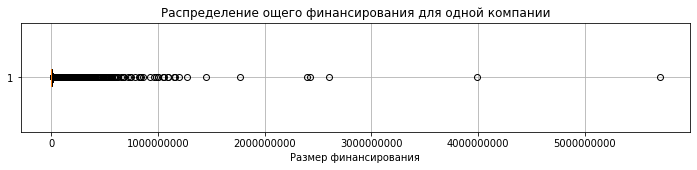

In [42]:
# Строим диаграмму размаха методом boxplot()
plt.figure(figsize=(12, 2))
plt.boxplot(df_company_filtered['funding_total'],
            vert=False  # Устанавливаем горизонтальную ориентацию
           )

plt.title('Распределение ощего финансирования для одной компании')
plt.xlabel('Размер финансирования')
plt.grid(True)

current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:.0f}'.format(x) for x in current_values])

# Отображаем график
plt.show()

На диаграмме присутствуют значительные выбросы, которые негативно сказываются на визуальном анализе.

Построим диаграмму  без отображения выбросов

count    4.074700e+04
mean     1.013561e+07
std      5.646436e+07
min      0.000000e+00
25%      0.000000e+00
50%      6.000000e+05
75%      5.650650e+06
max      5.700000e+09
Name: funding_total, dtype: float64


/tmp/ipykernel_292/2828917817.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:.0f}'.format(x) for x in current_values])


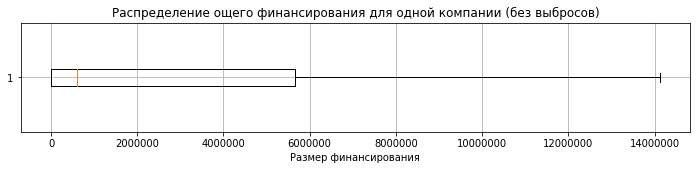

In [43]:
# Рассмотрим распределение значений в столбце 'funding_total'
print(df_company_filtered['funding_total'].describe())

# Строим диаграмму размаха методом boxplot() с отключенным отображением выбросов
plt.figure(figsize=(12, 2))
plt.boxplot(df_company_filtered['funding_total'],
            showfliers=False, # Отключим отображение выбросов
            vert=False  # Устанавливаем горизонтальную ориентацию
           )

plt.title('Распределение ощего финансирования для одной компании (без выбросов)')
plt.xlabel('Размер финансирования')
plt.grid(True)

current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:.0f}'.format(x) for x in current_values])

# Отображаем график
plt.show()

#### Промежуточные выводы
Проанализировав полученные результаты имеем:
- Среднее значение финансирования на одну компанию составляет 10 135 609
- процентиль 25% составляет 0
- процентиль 50% составляет 600 000
- процентиль 75% составляет 5 650 650, что является границей выбросов
- максимальное значение составляет 5 700 000 000 долларов
- на диаграмме видно значительное колличество выбросов вправо

Следовательно видим значительное смещение общего финансирования влево, что указывает на
- 600 000 долларов является типичным размером общего финансирования
- значительное колличество компаний с нулевым финансированием
- такая разница между медианным и средним значением финансирования указывает на значительную разницу между типичными и максимальными суммами финансирования
- такой характер распределения показывает что основаная масса сделок имеет низкую стоимость.


### Куплены забесплатно?

- Исследуйте компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.

- Рассчитайте аналитически верхнюю и нижнюю границу выбросов для столбца `funding_total` и укажите, каким процентилям границы соответствуют.

Определим колличество компаний проданных меньше чем за 1 доллар

Для этого присоединим датасет `df_acq`

In [44]:
# Отфильтруем столбцец
df_company_acq = df_company_filtered.merge(df_acq,
                                         how = 'left', 
                                         left_on='company_id',
                                         right_on = 'acquired_company_id'
                                        ).reset_index()

# Рассмотрим дубликаты по столбцу company_id
print(df_company_acq.duplicated(subset='company_id').sum())

143


В датасете `df_company_acq` Содержиьтся 143 дубликата по столбцу `company_id`.
Рассмотрим эти данные внимательнее

In [45]:
display(df_company_acq[df_company_acq.duplicated(subset='company_id', keep=False)].sort_values(by = 'acquired_company_id', ascending=True).head(10))

,index,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
1235,1235,13,StumbleUpon,web,acquired,2002-02-01,NaT,stumbleupon.com,stumbleupon,USA,0,4,18500000,5,4283.0,20.0,13.0,NaN,0.000000e+00,2007-05-30
1236,1236,13,StumbleUpon,web,acquired,2002-02-01,NaT,stumbleupon.com,stumbleupon,USA,0,4,18500000,5,5984.0,13.0,13.0,NaN,2.900000e+07,2009-04-01
34757,34757,62,Skype,software,acquired,2003-08-01,NaT,skype.com,skype,LUX,3,5,76805000,6,5504.0,1242.0,62.0,cash,8.500000e+09,2011-05-10
34758,34758,62,Skype,software,acquired,2003-08-01,NaT,skype.com,skype,LUX,3,5,76805000,6,5806.0,20.0,62.0,NaN,2.600000e+09,2005-09-12
38030,38030,75,delicious,web,acquired,2003-09-01,NaT,delicious.com,Delicious,USA,0,1,0,6,8668.0,74819.0,75.0,NaN,0.000000e+00,2011-04-27
38029,38029,75,delicious,web,acquired,2003-09-01,NaT,delicious.com,Delicious,USA,0,1,0,6,5451.0,29.0,75.0,cash,0.000000e+00,2005-12-01
1237,1237,130,KickApps,enterprise,acquired,2004-03-01,NaT,kickapps.com,KickApps,USA,0,3,39007800,5,5073.0,475.0,130.0,NaN,0.000000e+00,2011-01-31
1238,1238,130,KickApps,enterprise,acquired,2004-03-01,NaT,kickapps.com,KickApps,USA,0,3,39007800,5,9040.0,234881.0,130.0,NaN,0.000000e+00,2012-12-12
2188,2188,142,Bebo,web,acquired,2005-01-06,NaT,bebo.com,Bebo_Official,USA,0,1,15000000,3,5955.0,5602.0,142.0,NaN,1.000000e+07,2010-06-17
2187,2187,142,Bebo,web,acquired,2005-01-06,NaT,bebo.com,Bebo_Official,USA,0,1,15000000,3,213.0,351.0,142.0,cash,8.500000e+08,2008-03-13


Возникновение дубликатов связано с перепродажами одной и той же компании.

Для дальнейшего анализа оставим эти дубликаты как есть

In [46]:
df_company_acq_filtered = df_company_acq[(df_company_acq.status == "acquired") & (df_company_acq.price_amount < 2) & (df_company_acq.funding_total != 0) ]

print('Кол-во компаний проданных менее чем за 1 доллар', len(df_company_acq_filtered))
print('Доля компаний проданных менее чем за 1 доллар', round(len(df_company_acq_filtered)/len(df_company_acq), 4))

Кол-во компаний проданных менее чем за 1 доллар 1618
Доля компаний проданных менее чем за 1 доллар 0.0396


Определим верхнюю и нижнюю границу выбросов, а также каким процентилям соответствуют эти границы

In [47]:
q1 = df_company_filtered['funding_total'].quantile(0.25)
q3 = df_company_filtered['funding_total'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
lower_bound = max(0, lower_bound)

upper_bound = q3 + 1.5 * iqr
print('Нижняя граница выбросов:', lower_bound)
print('Верхняя граница выбросов:', upper_bound) 

lower_percentile = (df_company_filtered['funding_total'] < lower_bound).mean() * 100
upper_percentile = (df_company_filtered['funding_total'] < upper_bound).mean() * 100
print(f'Нижняя граница выбросов соответствует примерно {lower_percentile:.2f}-му процентилю во всем датасете.')
print(f'Верхняя граница выбросов соответствует примерно {upper_percentile:.2f}-му процентилю во всем датасете.') 

Нижняя граница выбросов: 0
Верхняя граница выбросов: 14126625.0
Нижняя граница выбросов соответствует примерно 0.00-му процентилю во всем датасете.
Верхняя граница выбросов соответствует примерно 85.62-му процентилю во всем датасете.


#### Промежуточные выводы
Из проведенного анализа следует:
1. 1618 компании проданы менее чем за доллар, что соответствует 3,96% всех компаний
2. границы выбросов
    - Нижняя граница выбросов равна 0 (процентиль 0)
    - Нижняя граница выбросов равна 14 126 625 (процентиль 85,62)

Исходя из полученной информации следует:
- 3,96% проданы бесплатно
- 15% компаний проданы аномально дорого
   


### Цены стартапов по категориям

In [48]:
q90 = df_company_acq['price_amount'].quantile(0.90)

# сгруппируем компании по категории стартапов
    #и вычислим среднее значение и стандартное отклонение по полю 'funding_total'
df_merged= pd.DataFrame()

df_merged['median'] = df_company_acq[
        (df_company_acq['price_amount']>0) & (df_company_acq['price_amount']<q90)
        ].groupby('category_code')['price_amount'].median().sort_values(ascending=False)

df_merged['std'] = round(df_company_acq[
        (df_company_acq['price_amount']>0) & (df_company_acq['price_amount']<q90)
        ].groupby('category_code')['price_amount'].std().sort_values(ascending=False), 0)

display(df_merged.head(10))

,median,std
category_code,,
fashion,97500000.0,NaN
analytics,80000000.0,NaN
health,74500000.0,45218682.0
messaging,57500000.0,53674171.0
cleantech,51190000.0,34454636.0
photo_video,45000000.0,10593827.0
automotive,43000000.0,NaN
finance,40575000.0,37563869.0
real_estate,40000000.0,24758837.0


#### Промежуточные выводы
Исходя из полученных результатов можно сделать выводы:
- в категории `health`, `cleantech`, `photo_video`, `real_estate` стандартное отклонение значительно ниже медианного значения. Эти категории рекомендуются для инвистиций с высокими рисками, так как имеют типично высокие цены покупки стартапов и значительные разбросы цен.
- аналогичная ситуация, но с меньшими значениями наблюдается в категориях `messaging`, `finance`, `security`

### Сколько раундов продержится стартап перед покупкой

funding_rounds,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
status,,,,,,,,,,,,,,,
operating,17377,10128,6492,3964,2505,1224,791,392,360,200,66,24,13,14,30
closed,1566,724,279,168,70,18,49,16,0,0,0,0,0,0,0
acquired,1361,1244,1041,600,290,156,119,56,18,10,11,12,0,0,0
ipo,230,188,174,132,135,96,70,72,36,20,33,0,52,0,0


status
ipo          4.471729
acquired     2.758438
operating    2.491418
closed       1.886505
Name: funding_rounds, dtype: Float64


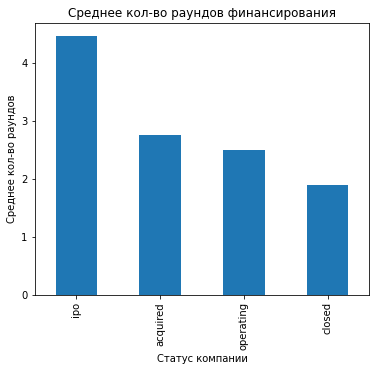

In [49]:
# Составим сводную таблицу по статусу компании с колличеством раундов финансирования
pivot_table = pd.pivot_table(
    df_comp_raunds_update[df_comp_raunds_update['funding_rounds']>0],
    index='status',
    columns='funding_rounds',
    values='company_id',
    aggfunc='count',
    fill_value=0
)
# Отсортируем таблицу по столбцу с 1 раундом финансирования
pivot_table = pivot_table.sort_values(by=1, ascending=False)

# Среднее кол-во раундов по статусу комапнии
status_round_mean = df_comp_raunds_update[df_comp_raunds_update['funding_rounds']>0].groupby(['status'])['funding_rounds'].mean().sort_values(ascending=False)

display(pivot_table)
print(status_round_mean)

# Строим график
# Устанавливаем размеры графика
plt.figure(figsize=(6, 5))

# Строим гистограмму 
status_round_mean.plot(
    kind='bar',
    legend = False)

plt.xlabel('Статус компании')
plt.ylabel('Среднее кол-во раундов')
plt.title('Среднее кол-во раундов финансирования')

plt.show()

#### Промежуточные выводы

1. Один раунд финансирования - типичное значение для всех статусов компаний
2. Наибольшее колличество раундов финансирования имеют компании со статусом `ipo`

### Промежуточный вывод по Шагу 3
1. Для аналитического исследования использовался объединенный датасет:
    - объединение происходило из двух датасетов `df_company` и `df_rounds`
    - колличество строк в датасете 61666
    - колличество компаний в датасете 40747
2. Распределение значений в столбце `funding_total` (сумма финансирования):
    - среднее значение финансирования на одну компанию составляет 10 135 610 долларов
    - половина компаний имеет финансирование меньше 600 000 долларов
    - значительное колличество компаний имеют нулевое финансирование
    - у нескольких компаний размер финансирования больше 1 000 000 000
    - максимальный размер финансирования составляет 5 700 000 000
3. Стоимость покупки компаний:
    - 1618 компании проданы менее чем за доллар, что составляет 3,96% от общего колличества компаний
    - 15% компаний проданы аномально дорого (выше 14 126 625 долларов)
4. Распределение цен на стартапы по категориям:
    - в категории `health`, `cleantech`, `photo_video`, `real_estate` стандартное отклонение значительно ниже медианного значения. Эти категории рекомендуются для инвистиций с высокими рисками, так как имеют типично высокие цены покупки стартапов и значительные разбросы цен.
    - аналогичная ситуация, но с меньшими значениями наблюдается в категориях `messaging`, `finance`, `security`
5. Раунды финансирования
    - большая часть компаний продается на первом раунде финансирования
    - наибольшее колличество раундов финансирования имеют компании со статусом `ipo`



## Шаг 4. Итоговый вывод и рекомендации
Из аналитического исследования следует:
1. Численность большинства компаний не превышает 4 человека
2. Лишь 30% сотрудников компаний имеют образование
3. С 2005 года на рынке происходит снижение инвистиционных средств
4. Около 30 % компаний продаются за 1 доллар или бесплатно, что свидетельствует об особых условиях (договоренностях) при продаже.
5. Большинство стратапов продается в первом раунде финансирования
6. Стоимсоть стартапов очень сильно разбросана, а значит можно инвестировать как в крупные так и мелкие суммы
7. Для инвистирования с высокими рисками подхлдят компании из категорий `health`, `cleantech`, `photo_video`, `real_estate`, так как они имеют типично высокие цены покупки стартапов и значительные разбросы цен.